In [1]:
#Importing Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
import tensorflow as tf
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.1


In [2]:
#Importing Dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a>Exploratory data analysis (EDA)<a>

Text(0.5, 1.0, 'Age Distibution')

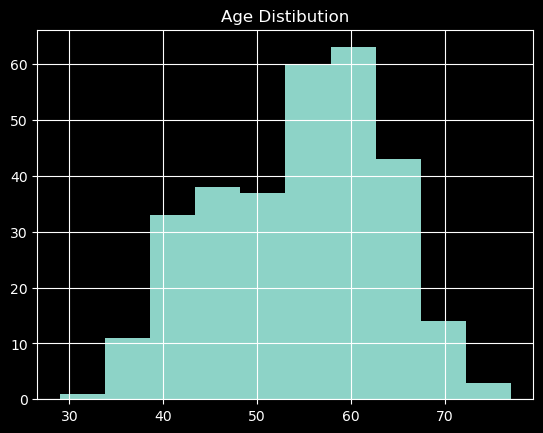

In [9]:
plt.style.use('dark_background')
df['age'].hist(grid=True, bins = 10);
plt.title('Age Distibution')

C:\Users\ankit\AppData\Local\Temp\ipykernel_27196\1140102936.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],  label='female')
c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ankit\AppData\Local\Temp\ipykernel_27196\1140102936.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figu

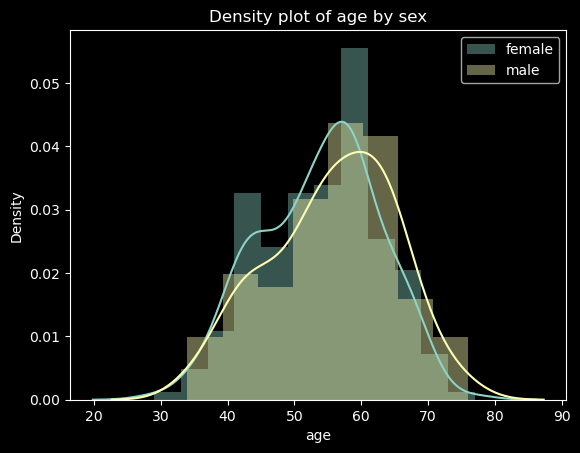

In [13]:
sns.distplot(df[df['sex']==1]['age'],  label='female')
sns.distplot(df[df['sex']==0]['age'], label='male')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

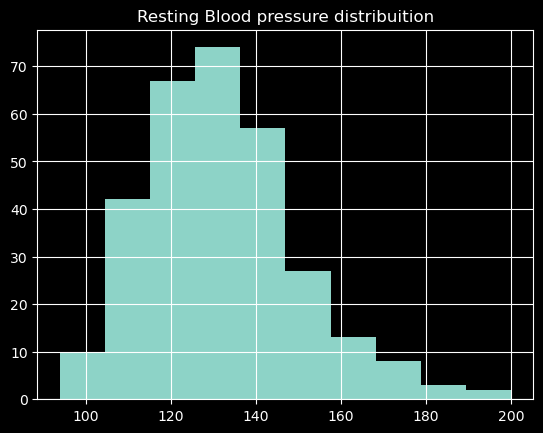

In [14]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='oldpeak'>

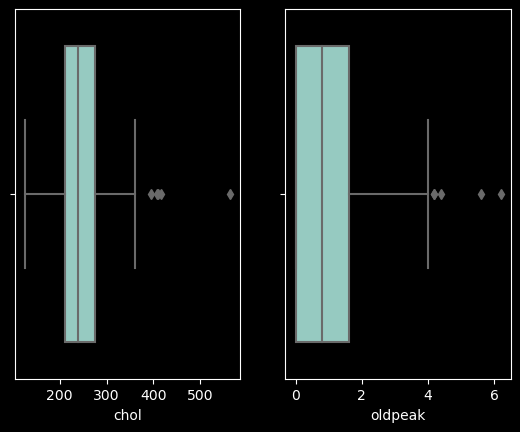

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=df,  orient='v', ax=axes[1])

C:\Users\ankit\AppData\Local\Temp\ipykernel_27196\1317981768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'], bins=10)
c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


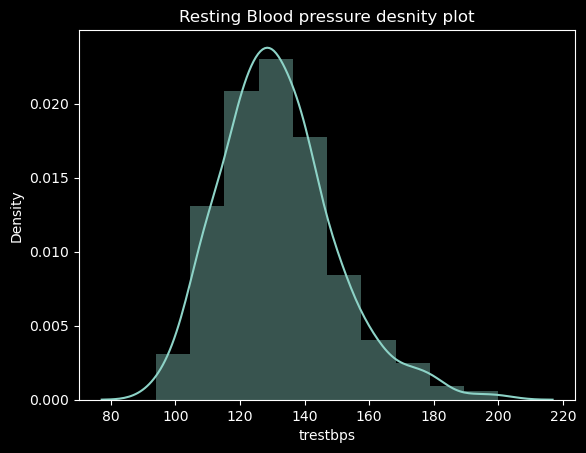

In [16]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

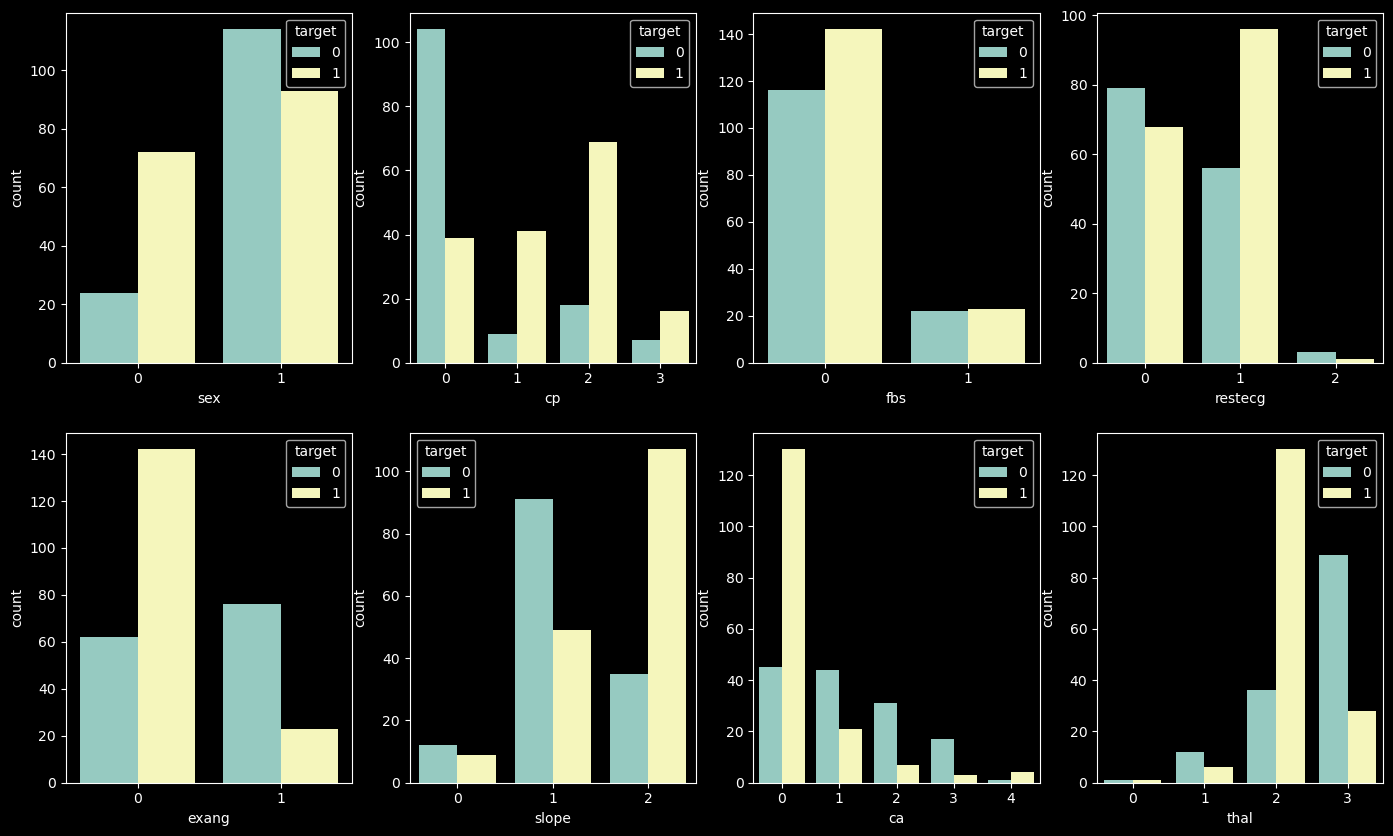

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    if feature != 'target':
        ax = axes[int(idx/4), idx%4]
        sns.countplot(x=feature, hue='target', data=df,ax=ax)

Text(0.5, 1.0, 'Count of target feature by sex')

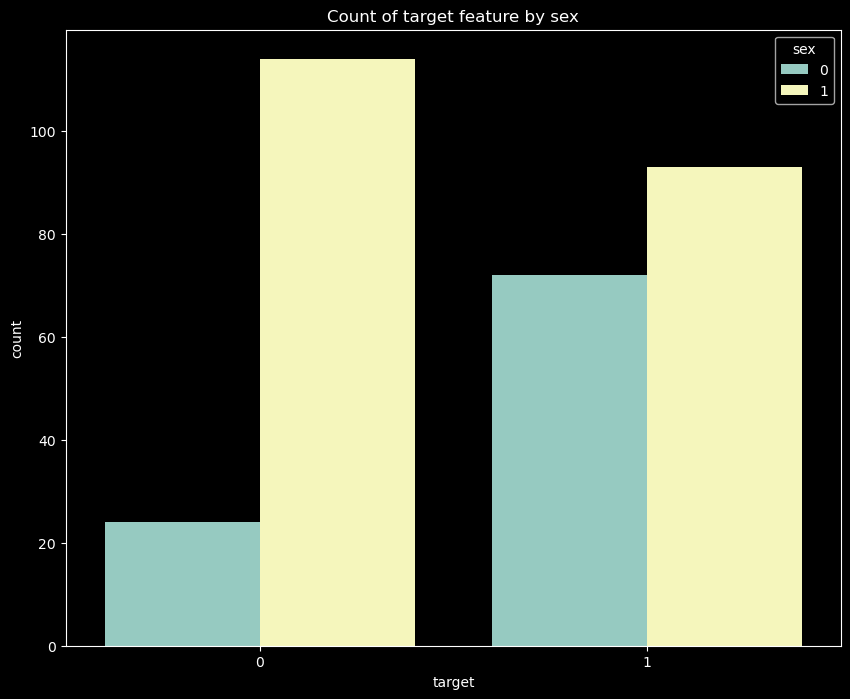

In [18]:
plt.rcParams['figure.figsize'] = (10,8)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

<Axes: >

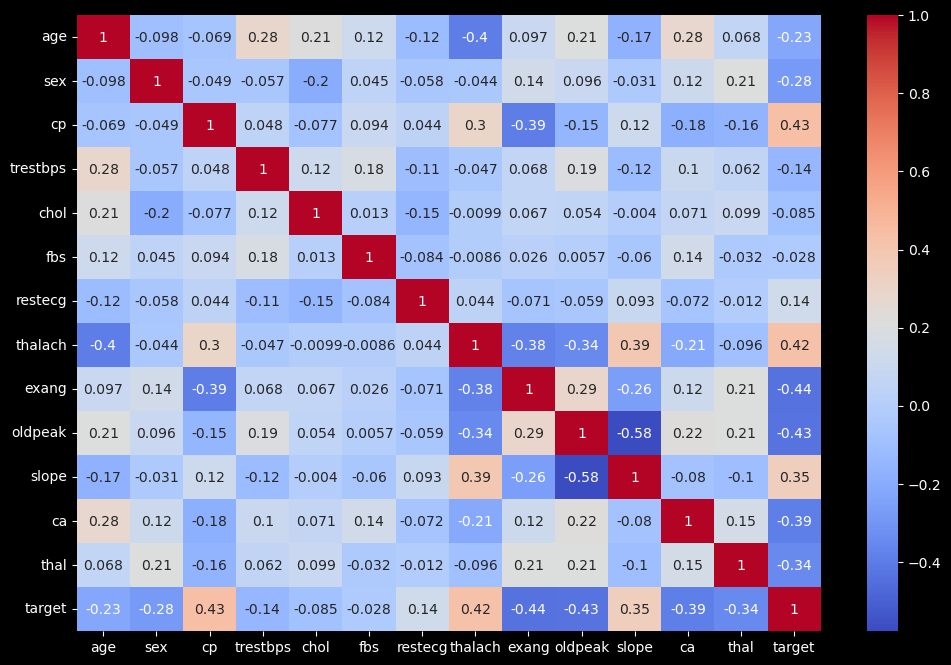

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Text(0.5, 1.0, ' Cholesterol vs Blood pressure in rest')

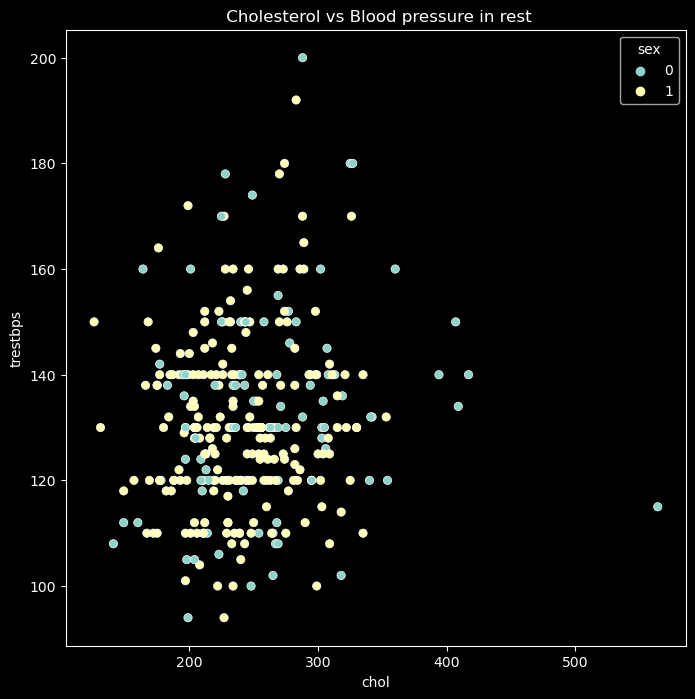

In [20]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None, data=df)
plt.title(' Cholesterol vs Blood pressure in rest')

In [22]:
X = df.drop(columns=['target'])
Y = df['target']
print(X.shape)
print(Y.shape)

(303, 13)
(303,)


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=101, train_size=0.72)
print(x_train.shape)
print(x_test.shape)

(218, 13)
(85, 13)


In [27]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [30]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 1.0
Test score 0.7647058823529411


In [32]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')#For g and G , the maximum number of significant digits
    plt.tight_layout()
    plt.show()

Train Confusion matrix


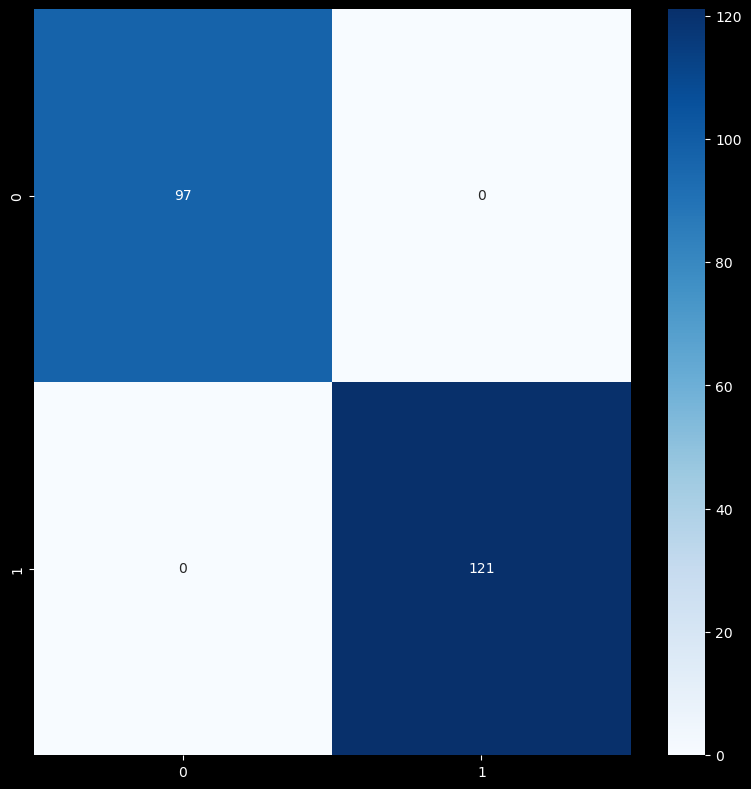

Test Confusion matrix


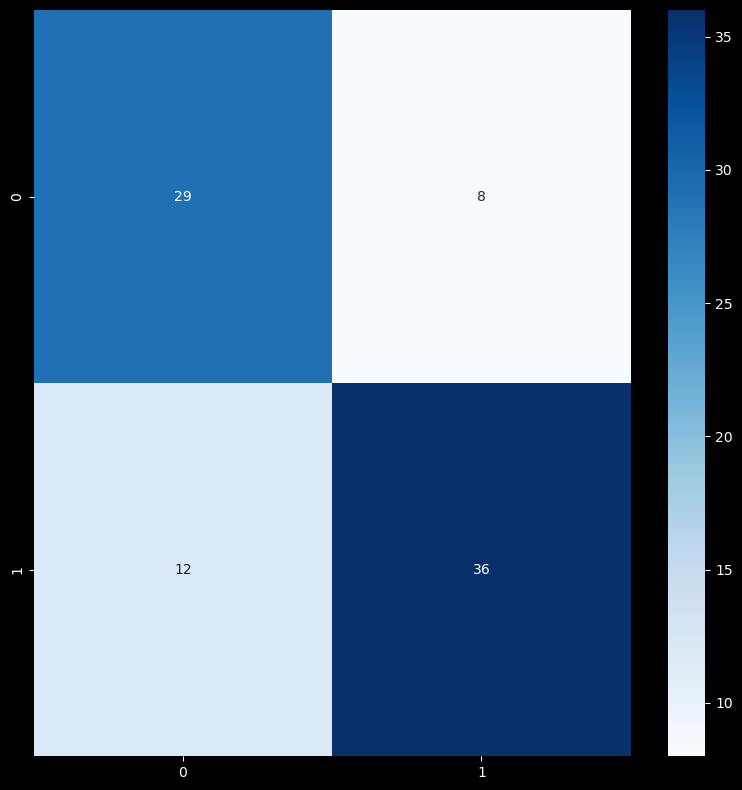

In [33]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        37
           1       0.82      0.75      0.78        48

    accuracy                           0.76        85
   macro avg       0.76      0.77      0.76        85
weighted avg       0.77      0.76      0.77        85



In [37]:
plt.rcParams["figure.figsize"] = (30,20)
